# **Exploring Supervised Machine Learning**

Task #2 at the DS/ML internship at TSF.  
This task is done **without** using the Sklearn module in this notebook.

## Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Import Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

### Minimize the line parameters using gradient descent

In [2]:
def update_line(b, m, data, alpha = 0.001, iter = 1000):
  b = b
  m = m
  n = len(data)
  for i in range(iter):
    # find gradient using backprop
    dm = np.sum(((m*data[:,0] + b) - data[:,1]) * data[:,0]) # ((mx + b) - y)*x
    db = np.sum((m*data[:,0] + b) - data[:,1]) # (mx + b) - y)

    # update parameters
    m -= alpha * (dm * 2 / n)
    b -= alpha * (db * 2 / n)
  
  return [b, m]

### Plot the line found by the gradient descent

In [3]:
def plot_line(b, m, data):
  axes = plt.gca()
  x = np.array(axes.get_xlim())
  y = m * x + b
  plt.plot(data[:,0], data[:,1], 'o')
  plt.plot(x, y, "r-")

### Calculate the mean absolute error

In [4]:
def maerror(data, b, m):
  err = np.sum(np.abs((m * data[:, 0] + b) - data[:,1]))
  err = err / len(data)
  return err 

### Predict values according to the line

In [5]:
def predict(x, b, m):
  y = m * x + b
  return y

### Import dataset

In [6]:
# load dataset    
d_url = "http://bit.ly/w-data"
datapoints = np.array(pd.read_csv(d_url))

### Initialize the parameters

In [7]:
# rate of learning      
learning_rate = 0.0001

initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 1000

### Find the best-fit line

In [8]:
# error before regression
initial_error = maerror(datapoints, initial_b, initial_m)
print("Starting gradient descent at intercept = {}, slope = {}, and mean absolute error = {}".format(initial_b, initial_m, initial_error))

# error after regression
[b, m] = update_line(initial_b, initial_m, datapoints, learning_rate, num_iterations)
final_error = maerror(datapoints, b, m)
print("After {} iterations, intercept = {}, slope = {}, and mean absolute error = {}".format(num_iterations, b, m, final_error))

Starting gradient descent at intercept = 0, slope = 0, and mean absolute error = 51.48
After 1000 iterations, intercept = 1.6314708810783125, slope = 9.896964110671043, and mean absolute error = 5.0367828352985535


### Predict as per required

In [13]:
hours = 9.25
y = predict(hours, b, m)
print(y)

93.17838890478546


### Plot relation

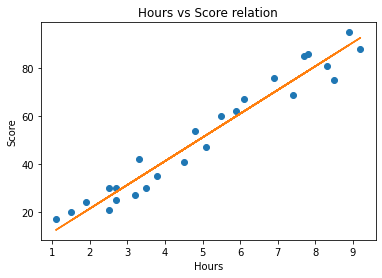

In [11]:
plt.plot(datapoints[:,0], datapoints[:,1], 'o')
plt.plot(datapoints[:,0], predict(datapoints[:,0], b, m))
plt.xlabel("Hours")
plt.ylabel("Score")
plt.title("Hours vs Score relation")
plt.show()